In [146]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk
nltk.download('stopwords')# preprocessing text
nltk.download('wordnet')
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [157]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from textblob import TextBlob
# import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline

### Now considering only the rows that have values greater than 3.5 stars and sentipolarity value greater than 0.               We get 4934 rows

In [147]:
foodon_merged=pd.read_csv("foodon_merged1.csv")
foodon_merged.drop('Unnamed: 0',axis=1,inplace= True)
foodon_merged

BusinessAcceptsCreditCards  RestaurantsPriceRange2       Monday  \
0                           True                     2.0          NaN   
1                           True                     2.0    7:30-19:0   
2                          False                     1.0          NaN   
3                          False                     1.0   11:30-22:0   
4                           True                     2.0   11:30-21:0   
5                           True                     1.0    11:0-23:0   
6                           True                     2.0    7:30-18:0   
7                            NaN                     2.0    17:0-22:0   
8                           True                     2.0   10:30-23:0   
9                            NaN                     2.0     11:0-1:0   
10                          True                     1.0    11:0-23:0   
11                           NaN                     1.0  11:30-22:30   
12                           NaN                     2.0          NaN   
13                          True                     2.0     8:0-23:0   
14                          True                     2.0    10:0-22:0   
15                          True                     2.0    17:0-21:0   
16                          True                     1.0    10:0-20:0   
17                          True                     2.0     9:0-16:0   
18                           NaN                     3.0          NaN   
19                          True                     2.0     16:0-0:0   
20                          True                     2.0     8:0-18:0   
21                          True                     2.0     9:0-21:0   
22                           NaN                     1.0          NaN   
23                          True                     2.0    11:0-23:0   
24                         False                     1.0          NaN   
25                          True                     3.0          NaN   
26                          True                     2.0          NaN   
27                          True                     2.0   11:0-22:30   
28                          True                     2.0     7:0-21:0   
29                          True                     3.0     16:0-1:0   
...                          ...                     ...          ...   
13195                       True                     NaN    11:0-23:0   
13196                        NaN                     1.0     9:0-21:0   
13197                        NaN                     2.0    11:0-18:0   
13198                       True                     2.0          NaN   
13199                      False                     1.0          NaN   
13200                       True                     2.0          NaN   
13201                       True                     1.0          NaN   
13202                        NaN                     1.0    11:0-18:0   
13203                        NaN                     1.0     7:0-16:0   
13204                       True                     2.0          NaN   
13205                       True                     2.0     16:0-4:0   
13206                        NaN                     NaN          NaN   
13207                        NaN                     2.0    11:0-20:0   
13208                        NaN                     1.0          NaN   
13209                        NaN                     2.0    10:0-21:0   
13210                        NaN                     NaN     17:0-1:0   
13211                       True                     1.0          NaN   
13212                       True                     2.0          NaN   
13213                        NaN                     NaN          NaN   
13214                       True                     1.0          NaN   
13215                        NaN                     1.0          NaN   
13216                       True                     2.0    11:0-23:0   
13217                        NaN                     NaN        

In [148]:
goodfood= foodon_merged[(foodon_merged['spm']>0)&(foodon_merged['stars']>3.5)]
goodfood

BusinessAcceptsCreditCards  RestaurantsPriceRange2       Monday  \
1                           True                     2.0    7:30-19:0   
3                          False                     1.0   11:30-22:0   
5                           True                     1.0    11:0-23:0   
6                           True                     2.0    7:30-18:0   
10                          True                     1.0    11:0-23:0   
12                           NaN                     2.0          NaN   
16                          True                     1.0    10:0-20:0   
17                          True                     2.0     9:0-16:0   
18                           NaN                     3.0          NaN   
19                          True                     2.0     16:0-0:0   
20                          True                     2.0     8:0-18:0   
21                          True                     2.0     9:0-21:0   
22                           NaN                     1.0          NaN   
24                         False                     1.0          NaN   
26                          True                     2.0          NaN   
31                         False                     1.0     6:0-21:0   
35                          True                     2.0          NaN   
37                          True                     2.0          NaN   
45                         False                     2.0     8:0-23:0   
52                           NaN                     NaN    7:0-15:30   
54                           NaN                     2.0    11:0-22:0   
55                          True                     1.0    10:0-22:0   
58                           NaN                     2.0    10:0-21:0   
60                          True                     2.0   12:0-22:30   
61                         False                     1.0    9:0-18:30   
65                          True                     1.0     8:0-22:0   
67                          True                     2.0    11:0-23:0   
68                          True                     1.0          NaN   
77                           NaN                     1.0     6:0-22:0   
78                          True                     2.0     17:0-2:0   
...                          ...                     ...          ...   
13149                       True                     1.0    10:0-21:0   
13151                       True                     2.0   11:30-22:0   
13157                        NaN                     1.0          NaN   
13160                       True                     2.0   10:30-23:0   
13162                        NaN                     2.0   10:30-22:0   
13163                      False                     2.0     8:0-16:0   
13164                       True                     2.0    7:30-16:0   
13168                        NaN                     1.0   11:30-23:0   
13169                       True                     1.0     11:0-2:0   
13171                        NaN                     2.0    11:0-21:0   
13172                      False                     1.0    11:0-22:0   
13175                       True                     3.0     8:0-18:0   
13177                        NaN                     NaN          NaN   
13179                       True                     2.0    11:0-22:0   
13180                       True                     1.0    12:0-20:0   
13183                       True                     2.0  11:30-22:30   
13184                        NaN                     NaN    10:0-19:0   
13186                       True                     2.0   11:30-23:0   
13187                      False                     2.0   11:0-16:30   
13192                        NaN                     NaN          NaN   
13193                        NaN                     2.0    11:0-23:0   
13197                        NaN                     2.0    11:0-18:0   
13199                      False                     1.0        

In [149]:
goodfood.to_csv("goodfood.csv")

In [150]:
indian = 'indian',
mexican = 'mexican',
thai = 'thai',
japanese = 'japanese',
italian = 'italian',
american_t = 'american (traditional)',
american_new = 'american (new)',
pakistani = 'pakistani',
mid_east = 'middle eastern',
chinese = 'chinese',
canadian_new = 'canadian (new)',
hungarian = 'hungarian',
german = 'german',
vietnamese = 'vietnamese',

business_type = 'indian','mexican','thai','japanese','italian','chinese','hungarian','german','vietnamese'
#' restaurants','restaurants',' food','food' ,' pizza', 'pizza', 'mexican',' mexican','american (traditional)', ' american (traditional)', 'american (new)', ' american (new)', 'italian', ' italian', 'indian', ' indian', 'pakistani', ' pakistani', 'thai', ' thai', 'japanese', ' japanese', 'french', ' french', 'canadian (new)', ' canadian (new)', 'middle eastern', ' middle eastern', 'german', ' german', 'vietnamese', ' vietnamese', 'chinese', ' chinese','hungarian', ' hungarian' 

business_type

('indian',
 'mexican',
 'thai',
 'japanese',
 'italian',
 'chinese',
 'hungarian',
 'german',
 'vietnamese')

In [151]:
xyz123 = pd.read_csv("textclearfood.csv")
xyz123.drop('Unnamed: 0',axis=1,inplace= True)
xyz123

BusinessAcceptsCreditCards  RestaurantsPriceRange2      Monday  \
0                            True                     2.0   7:30-19:0   
1                            True                     2.0   7:30-19:0   
2                            True                     2.0   7:30-19:0   
3                            True                     2.0   7:30-19:0   
4                            True                     2.0   7:30-19:0   
5                            True                     2.0   7:30-19:0   
6                            True                     2.0   7:30-19:0   
7                            True                     2.0   7:30-19:0   
8                            True                     2.0   7:30-19:0   
9                            True                     2.0   7:30-19:0   
10                           True                     2.0   7:30-19:0   
11                           True                     2.0   7:30-19:0   
12                           True                     2.0   7:30-19:0   
13                           True                     2.0   7:30-19:0   
14                           True                     2.0   7:30-19:0   
15                           True                     2.0   7:30-19:0   
16                           True                     2.0   7:30-19:0   
17                           True                     2.0   7:30-19:0   
18                           True                     2.0   7:30-19:0   
19                           True                     2.0   7:30-19:0   
20                           True                     2.0   7:30-19:0   
21                           True                     2.0   7:30-19:0   
22                           True                     2.0   7:30-19:0   
23                          False                     1.0  11:30-22:0   
24                          False                     1.0  11:30-22:0   
25                          False                     1.0  11:30-22:0   
26                          False                     1.0  11:30-22:0   
27                          False                     1.0  11:30-22:0   
28                          False                     1.0  11:30-22:0   
29                          False                     1.0  11:30-22:0   
...                           ...                     ...         ...   
208423                       True                     2.0   11:0-22:0   
208424                       True                     2.0   11:0-22:0   
208425                       True                     2.0   11:0-22:0   
208426                       True                     2.0   11:0-22:0   
208427                       True                     2.0   11:0-22:0   
208428                       True                     2.0   11:0-22:0   
208429                       True                     2.0   11:0-22:0   
208430                       True                     2.0   11:0-22:0   
208431                       True                     2.0   11:0-22:0   
208432                       True                     2.0   11:0-22:0   
208433                       True                     2.0   11:0-22:0   
208434                       True                     2.0   11:0-22:0   
208435                       True                     2.0   11:0-22:0   
208436                       True                     2.0   11:0-22:0   
208437                       True                     2.0   11:0-22:0   
208438                       True                     2.0   11:0-22:0   
208439                       True                     2.0   11:0-22:0   
208440                       True                     2.0   11:0-22:0   
208441                       True                     2.0   11:0-22:0   
208442                       True                     2.0   11:0-22:0   
208443                       True                     2.0   11:0-22:0   
208444                       True                     2.0   11:0-22:0   
208445                       True                     2.0   11:0-

## Find nearby Restaurants in map
### In this section, We will try to present a map where each restaurant on Yelp will be mapped . The user can zoom or move the cursor to find their desired restaurants. When the mouse hovers in each restaurants icon a text will pop up and show the restaurant's name and it's rating on Yelp. 

#### Take only name and stars for map over description

In [152]:
fff = goodfood[['name', 'stars']].astype(str).apply(lambda x: '->Rating: '.join(x), axis=1).tolist()
fff

["mabel's bakery->Rating: 4.0",
 "allwyn's bakery->Rating: 4.0",
 "regino's pizza->Rating: 4.5",
 'more than pies baking->Rating: 4.0',
 'burrito boyz->Rating: 4.0',
 'sunny foodmart->Rating: 4.0',
 'ave maria latin café->Rating: 4.5',
 'velvet sunrise coffee roasters->Rating: 4.5',
 'giulietta->Rating: 4.5',
 'folly brewpub->Rating: 4.0',
 'lindt boutique toronto - the path->Rating: 4.0',
 'latin world->Rating: 4.0',
 'galaxy t&t->Rating: 5.0',
 'semi fast food korean restaurant->Rating: 4.5',
 'starbucks->Rating: 4.0',
 'marathon donuts & coffee shop->Rating: 4.0',
 'balmoral fish & chips->Rating: 4.5',
 'garden deli->Rating: 4.0',
 'la paloma gelateria & cafe->Rating: 4.0',
 'sunset grill->Rating: 4.0',
 'rolltation->Rating: 4.0',
 'pizza break->Rating: 4.5',
 'purdys chocolatier->Rating: 5.0',
 'posticino ristorante->Rating: 4.0',
 'juice box->Rating: 5.0',
 'freshco->Rating: 4.0',
 'muncheez->Rating: 4.5',
 'south china herbs market->Rating: 4.0',
 'starbucks->Rating: 4.5',
 'the 

### The restaurants mentioned above will be displayed in the world map using mapbox where the user can get the informtion about the restarant name and the stars.

In [165]:
# mapbox access token. Go to Mapbox.com and sign up and get your access_token

mapbox_access_token= 'pk.eyJ1IjoiYXBla3NoYW5pbm5la2FyMTk5OCIsImEiOiJjanM0MjVia2IwMGo1NDl0MGw4YWh2aTFjIn0.6qSLJ-aneTuSeL6nvQCCMg'
# difine our data for ploting on mapbox
data = Data([
    Scattermapbox(
        lat=goodfood.latitude.tolist(),
        lon=goodfood.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=fff,
    )
])


layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=44.00,
            lon=-80.00
        ),
        # use style dark
        style='dark',
        pitch=0,
        # zoom label to 3
        zoom=8
    ),
)

# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')


## Lets find the top best restaurants on YELP!!
Based on the stars and the highest senti polarity values

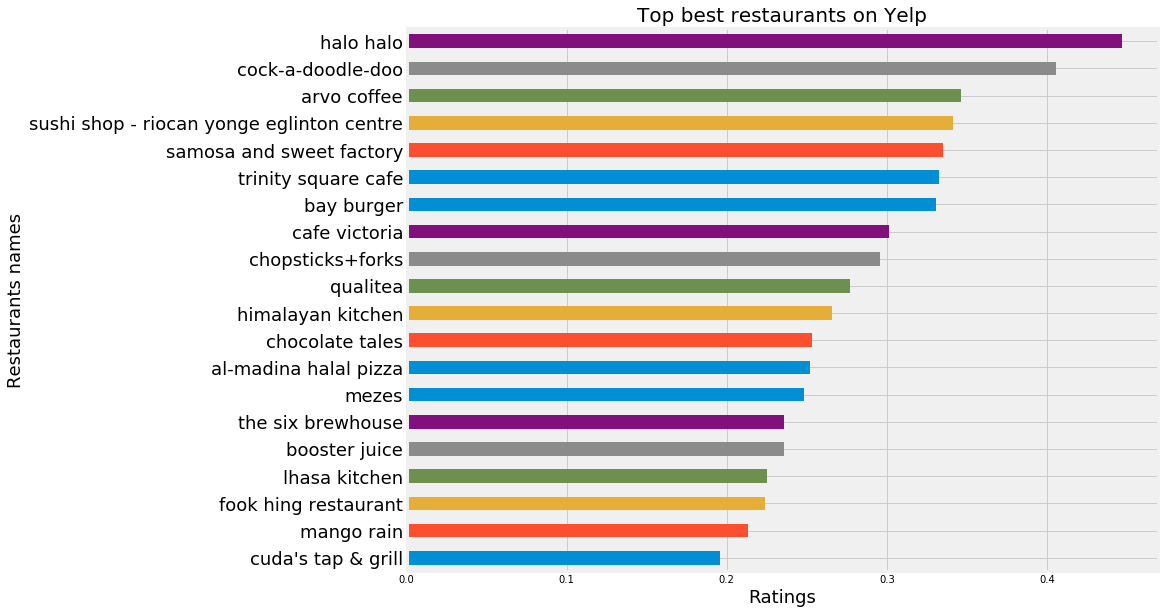

In [42]:
top_restaurants = goodfood.business_id.value_counts().index[:20].tolist()
review_top = goodfood.loc[goodfood['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['spm'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top best restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

## snappy food mart is the heighest rated restaurant on YELP!

### Plotting the wordcloud for the restaurant categories to know what are the most frequently used words in the reviews.

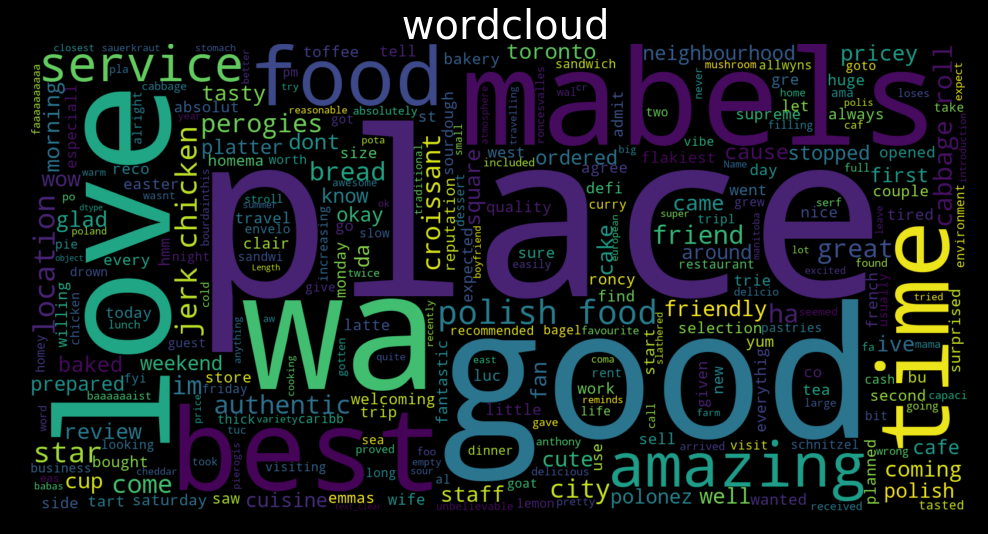

In [43]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(xyz123['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

# Finding the best restaurants for particular cuisines.

## 1. Indian cuisine

In [44]:
foodon_in = goodfood.loc[(goodfood['category1'].isin(indian)) | (goodfood['category2'].isin(indian)) | (goodfood['category3'].isin(indian)) | (goodfood['category4'].isin(indian)) | (goodfood['category5'].isin(indian)) | (goodfood['category6'].isin(indian)) | (goodfood['category7'].isin(indian)) | (goodfood['category8'].isin(indian)) | (goodfood['category9'].isin(indian)) | (goodfood['category10'].isin(indian))]
foodon_in

BusinessAcceptsCreditCards  RestaurantsPriceRange2       Monday  \
87                           NaN                     1.0    11:0-22:0   
107                         True                     2.0    17:0-22:0   
168                          NaN                     2.0    11:0-22:0   
192                        False                     1.0          NaN   
338                          NaN                     NaN          NaN   
403                         True                     2.0   11:30-22:0   
516                         True                     3.0    17:0-22:0   
659                          NaN                     2.0    17:0-22:0   
737                          NaN                     NaN   11:30-22:0   
833                          NaN                     2.0     14:0-2:0   
849                         True                     1.0     8:0-20:0   
894                          NaN                     2.0    11:0-20:0   
896                         True                     2.0   11:30-21:0   
954                         True                     1.0    11:0-19:0   
1037                         NaN                     2.0    11:0-21:0   
1085                         NaN                     NaN    11:0-23:0   
1189                         NaN                     NaN     16:0-4:0   
1305                         NaN                     NaN          NaN   
1340                         NaN                     2.0          NaN   
1348                       False                     1.0          NaN   
1369                         NaN                     2.0  11:30-21:30   
1604                         NaN                     2.0    17:0-22:0   
1724                        True                     1.0  11:30-22:30   
1788                         NaN                     2.0          NaN   
1876                        True                     2.0          NaN   
1912                         NaN                     NaN   11:30-21:0   
1943                         NaN                     1.0  10:30-21:30   
1960                        True                     2.0          NaN   
1978                        True                     2.0   11:30-22:0   
2002                         NaN                     1.0    11:0-21:0   
...                          ...                     ...          ...   
10369                        NaN                     2.0    17:0-22:0   
10441                        NaN                     NaN          NaN   
10462                      False                     1.0    11:0-21:0   
10530                        NaN                     2.0    17:0-22:0   
10546                       True                     2.0   11:30-15:0   
10625                       True                     NaN    11:0-21:0   
10641                       True                     2.0    11:0-22:0   
10847                       True                     2.0      0:0-0:0   
11102                        NaN                     2.0    11:0-22:0   
11157                       True                     2.0          NaN   
11164                       True                     2.0          NaN   
11203                       True                     2.0   11:30-22:0   
11264                       True                     2.0          NaN   
11468                       True                     1.0    11:0-22:0   
11533                      False                     1.0          NaN   
11859                        NaN                     2.0    12:0-22:0   
11885                       True                     2.0          NaN   
12108                       True                     2.0          NaN   
12139                       True                     2.0   17:0-21:30   
12226                        NaN                     2.0   11:0-21:30   
12254                        NaN                     1.0    8:0-21:30   
12385                       True                     1.0    11:0-22:0   
12398                       True                     2.0        

In [45]:
incloud= xyz123.loc[(xyz123['category1'].isin(indian))]

## Plotting the restaurants on map!

In [46]:
f1 = foodon_in[['name', 'stars']].astype(str).apply(lambda x: '->  Rating: '.join(x), axis=1).tolist()
f1

['peppers->  Rating: 4.5',
 'delhi bistro->  Rating: 4.0',
 'the spice room->  Rating: 4.5',
 "bara's hut doubles & roti->  Rating: 4.5",
 'aahara foods->  Rating: 4.5',
 'hakka delight->  Rating: 4.0',
 'pukka->  Rating: 4.0',
 'mayur fine indian cuisine->  Rating: 4.0',
 'bombay bhel->  Rating: 4.5',
 'king tandoori->  Rating: 4.0',
 'samosa and sweet factory->  Rating: 4.0',
 'spicy kitchen & pizzeria->  Rating: 4.0',
 'coriander green->  Rating: 4.0',
 'masala kitchen->  Rating: 4.0',
 'veggie planet->  Rating: 4.0',
 'halal shamiana restaurant->  Rating: 4.0',
 'taste of tandooree and sweets->  Rating: 4.0',
 "chaats n' dosa->  Rating: 4.5",
 "rick's good eats->  Rating: 4.5",
 "leela's roti & doubles->  Rating: 4.0",
 'hakka urban bistro->  Rating: 4.5',
 '39 spices->  Rating: 4.0',
 'blue water curry & roti restaurant->  Rating: 4.0',
 'baigs grill->  Rating: 5.0',
 'bacchus roti shop->  Rating: 4.0',
 'spice indian bistro->  Rating: 4.0',
 'bismillah sweets->  Rating: 4.0',
 'y

In [164]:
mapbox_access_token = 'pk.eyJ1IjoiYXBla3NoYW5pbm5la2FyMTk5OCIsImEiOiJjanM0MjB6dTEwMGh0NDNzYm94ZHF6eG45In0.sSX7mCthj_rPI2nRVR0G1A'

data = Data([
    Scattermapbox(
        lat=foodon_in.latitude.tolist(),
        lon=foodon_in.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=f1,
    )
])


layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=44.00,
            lon=-80.00
        ),
        # use style light
        style='dark',
        pitch=0,
        # zoom label to 3
        zoom=8
    ),
)

# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')


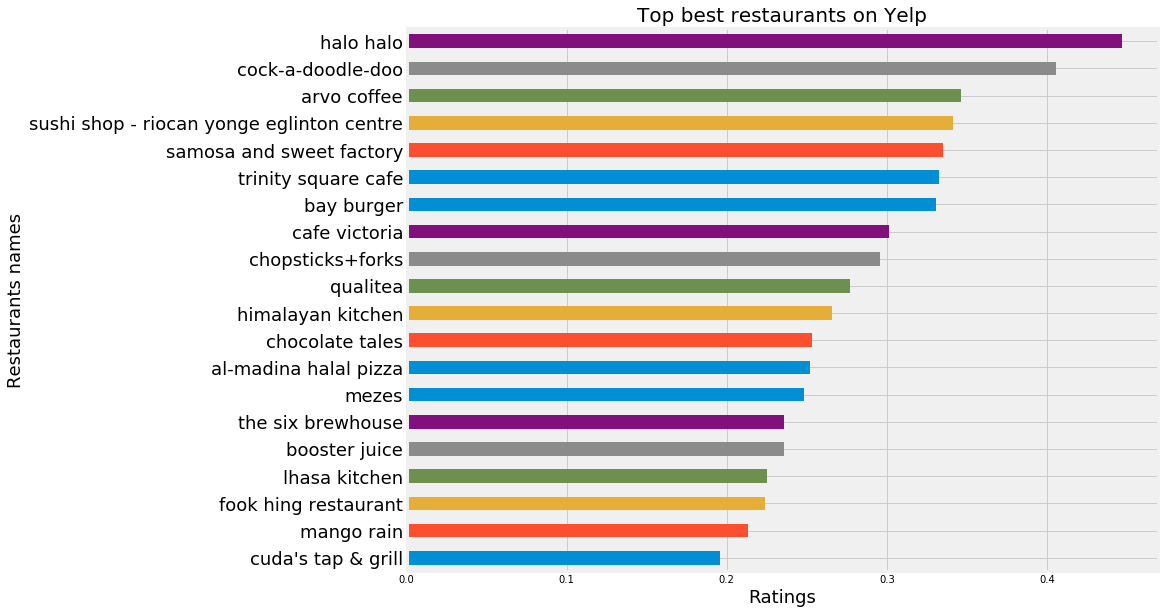

In [161]:
top_restaurants = goodfood.business_id.value_counts().index[:20].tolist()
review_top = goodfood.loc[goodfood['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['spm'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top best restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

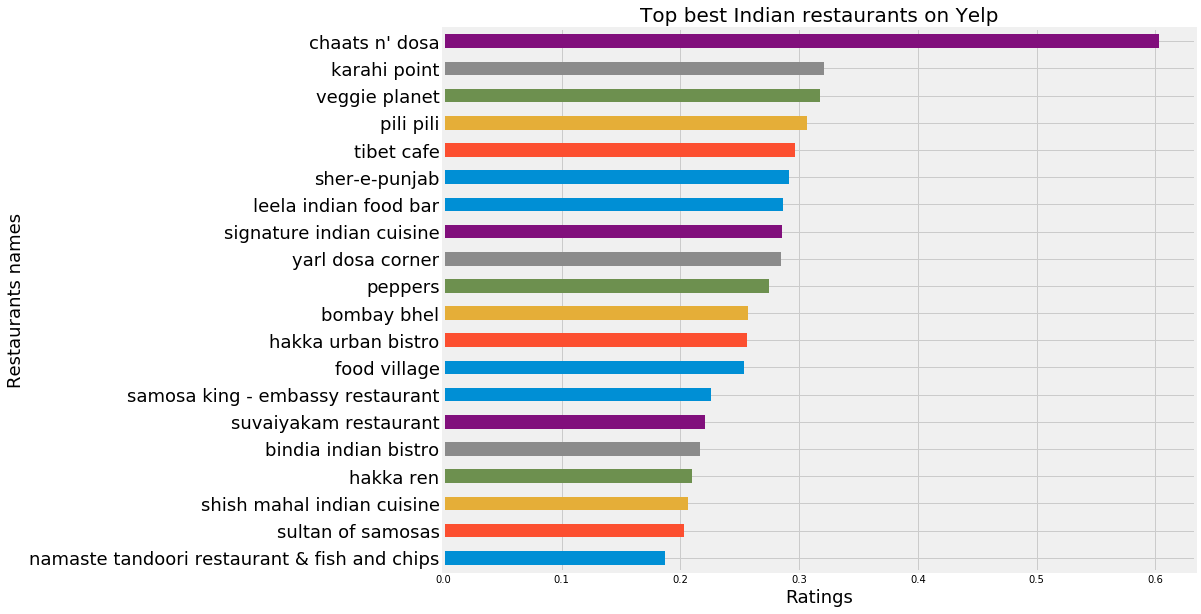

In [56]:
top_restaurants = foodon_in.business_id.value_counts().index[:20].tolist()
review_top = foodon_in.loc[foodon_in['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['spm'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top best Indian restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

## So, chaats n'dosa is the best Indian restaunt in Ontario!

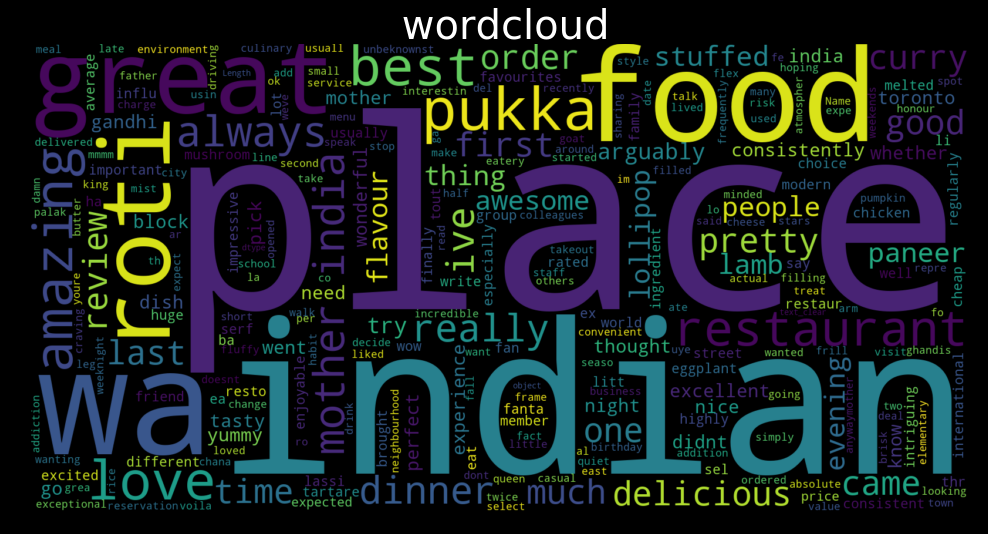

In [57]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(incloud['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

## 2. Italian cuisine

In [58]:
itcloud= xyz123.loc[(xyz123['category1'].isin(italian))]

In [59]:
foodon_it = goodfood.loc[(goodfood['category1'].isin(italian)) | (goodfood['category2'].isin(italian)) | (goodfood['category3'].isin(italian)) | (goodfood['category4'].isin(italian)) | (goodfood['category5'].isin(italian)) | (goodfood['category6'].isin(italian)) | (goodfood['category7'].isin(italian)) | (goodfood['category8'].isin(italian)) | (goodfood['category9'].isin(italian)) | (goodfood['category10'].isin(italian))]
foodon_it  

BusinessAcceptsCreditCards  RestaurantsPriceRange2       Monday  \
18                           NaN                     3.0          NaN   
55                          True                     1.0    10:0-22:0   
60                          True                     2.0   12:0-22:30   
149                         True                     2.0  11:30-15:30   
225                         True                     2.0          NaN   
236                          NaN                     NaN     9:0-19:0   
323                         True                     2.0    10:0-21:0   
365                         True                     1.0     6:0-20:0   
369                          NaN                     NaN   17:0-22:30   
431                          NaN                     NaN    11:0-23:0   
459                         True                     2.0    10:0-22:0   
500                         True                     3.0          NaN   
555                          NaN                     2.0    10:0-17:0   
573                         True                     2.0          NaN   
637                         True                     2.0    11:0-22:0   
669                          NaN                     NaN    11:0-20:0   
814                         True                     1.0    6:30-18:0   
829                         True                     1.0    17:0-21:0   
847                         True                     3.0   16:30-23:0   
872                         True                     2.0  11:30-14:30   
885                         True                     3.0    17:0-23:0   
931                         True                     2.0     8:0-18:0   
999                         True                     3.0    17:0-21:0   
1098                         NaN                     NaN     11:0-0:0   
1109                         NaN                     2.0          NaN   
1148                        True                     2.0          NaN   
1214                        True                     1.0     11:0-0:0   
1268                        True                     2.0     8:0-22:0   
1269                         NaN                     2.0    17:0-22:0   
1282                       False                     1.0     9:0-19:0   
...                          ...                     ...          ...   
12106                        NaN                     2.0    12:0-22:0   
12148                        NaN                     NaN    11:0-21:0   
12180                       True                     2.0          NaN   
12203                       True                     2.0          NaN   
12253                        NaN                     3.0  17:30-23:30   
12293                        NaN                     2.0          NaN   
12391                        NaN                     NaN     8:0-20:0   
12393                       True                     2.0     8:0-22:0   
12461                       True                     3.0          NaN   
12486                       True                     1.0    7:0-19:30   
12566                      False                     2.0          NaN   
12572                        NaN                     2.0     8:0-18:0   
12691                        NaN                     NaN          NaN   
12778                       True                     3.0     17:0-2:0   
12831                        NaN                     3.0   17:30-22:0   
12869                       True                     2.0    17:0-22:0   
12910                        NaN                     3.0   12:0-14:30   
12911                       True                     4.0   6:30-14:30   
12981                        NaN                     NaN    11:0-22:0   
13015                       True                     2.0    16:0-22:0   
13020                       True                     3.0    11:0-23:0   
13023                       True                     3.0    17:0-23:0   
13031                       True                     2.0    17:0

In [60]:
f2 = foodon_it[['name', 'stars']].astype(str).apply(lambda x: '-> Rating: '.join(x), axis=1).tolist()
f2

['giulietta-> Rating: 4.5',
 'pizza break-> Rating: 4.5',
 'posticino ristorante-> Rating: 4.0',
 'caffino ristorante-> Rating: 4.0',
 "lamanna's bakery-> Rating: 4.0",
 'palma pasta-> Rating: 4.0',
 'california sandwiches - woodbridge-> Rating: 4.0',
 'bodira cafe and fine foods-> Rating: 4.5',
 'anima trattoria and wine bar-> Rating: 5.0',
 'pizza hut-> Rating: 5.0',
 'panino cappuccino-> Rating: 4.5',
 'spiga ristorante-> Rating: 4.0',
 "j's apron-> Rating: 4.5",
 'prego restaurant-> Rating: 4.0',
 'modo mio italian bistro-> Rating: 4.5',
 "rosa's pasta express-> Rating: 5.0",
 'zona caffe-> Rating: 4.0',
 "michaelangelo's italian foods-> Rating: 4.5",
 'donatello restaurant-> Rating: 4.0',
 'la fonte trattoria-> Rating: 5.0',
 'five doors north-> Rating: 4.0',
 'san antonio foods-> Rating: 4.5',
 'villaggio ristorante-> Rating: 4.0',
 'via napoli-> Rating: 4.0',
 'belsito trattoria-> Rating: 4.0',
 'balsamico ristorante-> Rating: 4.5',
 "domino's pizza-> Rating: 4.5",
 'mattachioni

## Mapping the restaurants on worldmap!

In [144]:
mapbox_access_token = 'pk.eyJ1IjoiYXBla3NoYW5pbm5la2FyIiwiYSI6ImNqczQxaWRoMzAwY2U0YW81cHJvM2MwcmMifQ.CjrUaMFNvnpdMwlsu_iIOQ'
data = Data([
    Scattermapbox(
        lat=foodon_it.latitude.tolist(),
        lon=foodon_it.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=f2,
    )
])


layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=44.00,
            lon=-80.00
        ),
        # use style light
        style='dark',
        pitch=0,
        # zoom label to 3
        zoom=8
    ),
)

# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')


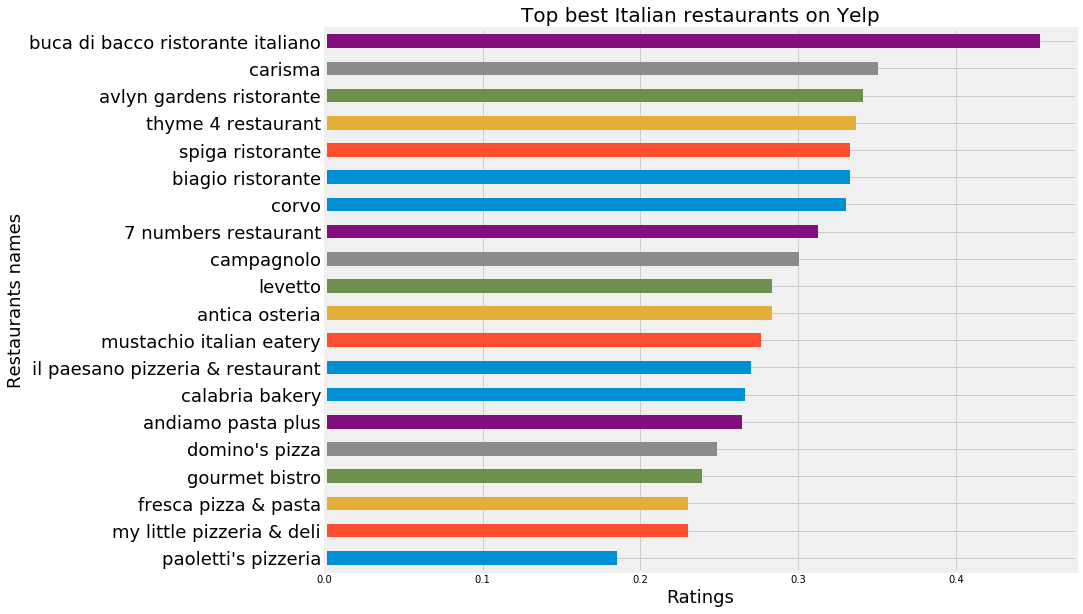

In [64]:
top_restaurants = foodon_it.business_id.value_counts().index[:20].tolist()
review_top = foodon_it.loc[foodon_it['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['spm'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top best Italian restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

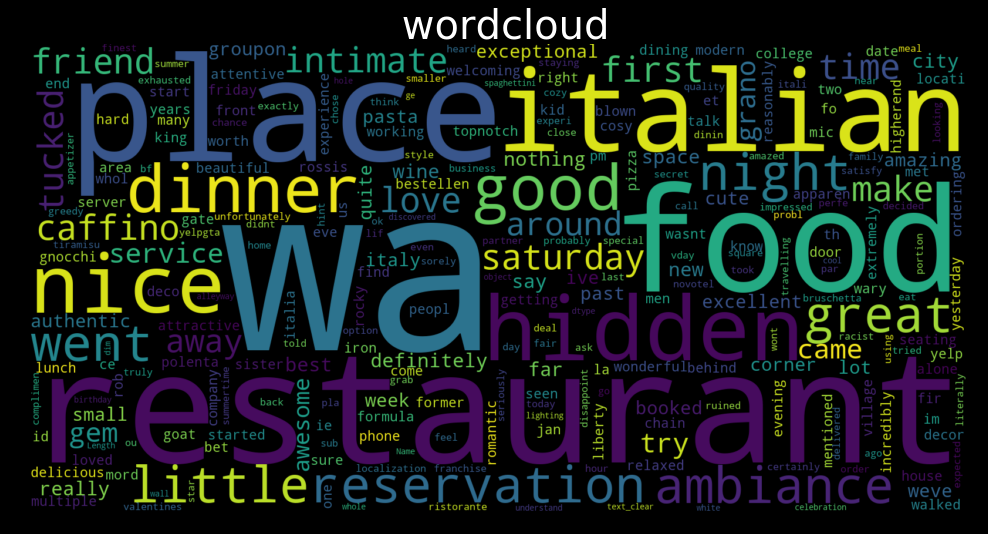

In [65]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(itcloud['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

# 3. Chinese cuisine

In [66]:
foodon_ch = goodfood.loc[(goodfood['category1'].isin(chinese)) | (goodfood['category2'].isin(chinese)) | (goodfood['category3'].isin(chinese)) | (goodfood['category4'].isin(chinese)) | (goodfood['category5'].isin(chinese)) | (goodfood['category6'].isin(chinese)) | (goodfood['category7'].isin(chinese)) | (goodfood['category8'].isin(chinese)) | (goodfood['category9'].isin(chinese)) | (goodfood['category10'].isin(chinese))]
foodon_ch

BusinessAcceptsCreditCards  RestaurantsPriceRange2       Monday  \
150                          NaN                     1.0          NaN   
164                         True                     2.0    11:0-22:0   
211                        False                     1.0    11:0-23:0   
221                          NaN                     2.0   11:30-22:0   
259                          NaN                     2.0    11:0-22:0   
262                         True                     NaN    15:0-21:0   
351                          NaN                     1.0   8:30-21:30   
400                          NaN                     2.0          NaN   
403                         True                     2.0   11:30-22:0   
456                        False                     1.0    11:0-22:0   
466                         True                     2.0  17:30-20:30   
482                         True                     2.0          NaN   
491                          NaN                     1.0    11:0-20:0   
504                         True                     2.0          NaN   
539                         True                     2.0   11:30-21:0   
554                          NaN                     NaN    15:0-22:0   
644                         True                     2.0    12:0-22:0   
671                          NaN                     2.0    11:0-23:0   
763                          NaN                     NaN   12:0-21:30   
860                          NaN                     2.0          NaN   
877                          NaN                     NaN   11:0-21:30   
911                         True                     NaN    12:0-22:0   
925                          NaN                     1.0    11:0-22:0   
1044                        True                     1.0    11:0-22:0   
1076                         NaN                     NaN          NaN   
1173                        True                     1.0    11:0-21:0   
1219                         NaN                     1.0          NaN   
1222                        True                     1.0          NaN   
1281                        True                     1.0   11:30-22:0   
1309                       False                     1.0          NaN   
...                          ...                     ...          ...   
11762                       True                     2.0    11:0-22:0   
11783                       True                     1.0    11:0-22:0   
11813                       True                     1.0   11:0-22:30   
11904                      False                     1.0     9:0-19:0   
11964                       True                     2.0    11:0-22:0   
12000                        NaN                     1.0   12:0-22:30   
12012                        NaN                     1.0   12:0-21:30   
12110                      False                     1.0    8:30-19:0   
12116                       True                     2.0    11:30-0:0   
12169                      False                     1.0    9:0-21:30   
12193                       True                     2.0    11:0-23:0   
12225                      False                     1.0    10:0-20:0   
12287                        NaN                     1.0    8:0-20:30   
12346                       True                     2.0    10:0-19:0   
12349                       True                     2.0    11:0-22:0   
12401                       True                     1.0   11:30-21:0   
12545                      False                     3.0    11:0-23:0   
12650                        NaN                     1.0    11:0-18:0   
12681                       True                     2.0   11:30-22:0   
12684                      False                     1.0    10:0-19:0   
12706                        NaN                     NaN    11:0-22:0   
12801                        NaN                     1.0   10:30-22:0   
12909                      False                     1.0    11:0

In [67]:
chcloud=xyz123.loc[(xyz123['category1'].isin(chinese))]

In [68]:
f3 = foodon_ch[['name', 'stars']].astype(str).apply(lambda x: '-> Rating: '.join(x), axis=1).tolist()
f3

['china china palace-> Rating: 4.0',
 'dynasty chinese restaurant-> Rating: 4.0',
 'hong far cafe-> Rating: 4.0',
 "guru's chinese cuisine-> Rating: 4.5",
 "tommy's restaurant-> Rating: 4.0",
 'wokin express-> Rating: 4.0',
 'my restaurant-> Rating: 4.0',
 "yip's kitchen-> Rating: 4.0",
 'hakka delight-> Rating: 4.0',
 'yummy yummy dumplings-> Rating: 4.0',
 'gohyang restaurant-> Rating: 4.0',
 'chopsticks szechuan chinese restaurant-> Rating: 4.0',
 'wonton chai noodle-> Rating: 4.0',
 'china gourmet king-> Rating: 4.0',
 'zen gardens-> Rating: 4.0',
 'noble wok-> Rating: 4.0',
 'lucky chinese restaurant-> Rating: 4.0',
 'orient express-> Rating: 4.0',
 'eupin chinese takeout-> Rating: 5.0',
 'do eat chinese-> Rating: 4.0',
 'beijing sung-> Rating: 4.0',
 'golden wok chinese restaurant-> Rating: 4.0',
 'delicious paradise kitchen-> Rating: 4.5',
 'good luck chinese restaurant-> Rating: 4.0',
 'river tai-> Rating: 4.0',
 'mean bao-> Rating: 4.0',
 'chop chop-> Rating: 4.0',
 'lucky sta

In [145]:
mapbox_access_token = 'pk.eyJ1IjoiYXBla3NoYW5pbm5la2FyIiwiYSI6ImNqb2hkdGdjazBnejQza3M2ZnFtd3dzZHUifQ.-9UbYbfjMlIeLgR0-Bzt9Q'
data = Data([
    Scattermapbox(
        lat=foodon_ch.latitude.tolist(),
        lon=foodon_ch.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=f3,
    )
])


layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=44.00,
            lon=-80.00
        ),
        # use style light
        style='dark',
        pitch=0,
        # zoom label to 3
        zoom=8
    ),
)

# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')

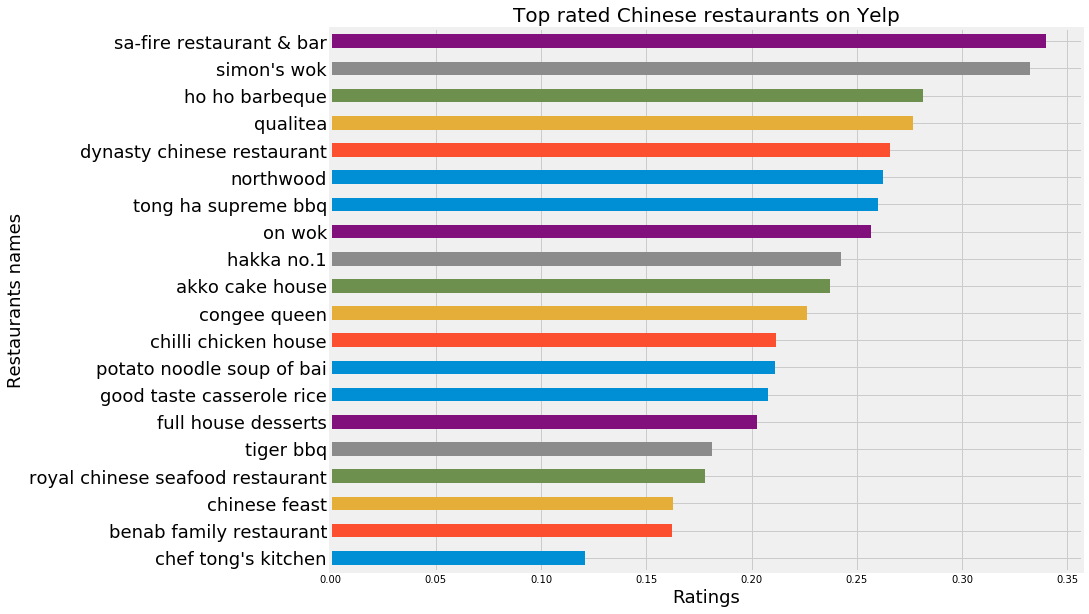

In [70]:
top_restaurants = foodon_ch.business_id.value_counts().index[:20].tolist()
review_top = foodon_ch.loc[foodon_ch['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['spm'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated Chinese restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

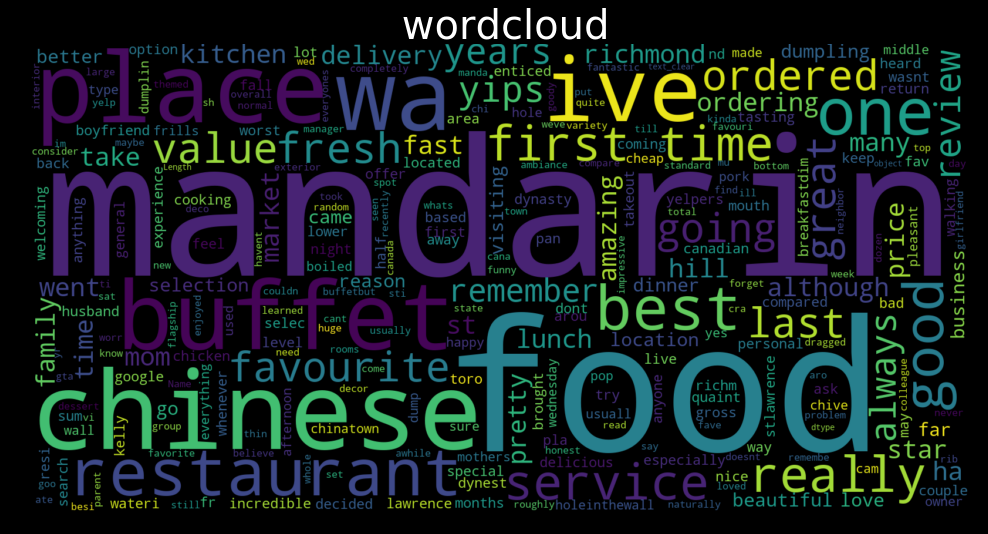

In [71]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(chcloud['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

# 4. Japanese cuisine

In [72]:
foodon_jp = goodfood.loc[(goodfood['category1'].isin(japanese)) | (goodfood['category2'].isin(japanese)) | (goodfood['category3'].isin(japanese)) | (goodfood['category4'].isin(japanese)) | (goodfood['category5'].isin(japanese)) | (goodfood['category6'].isin(japanese)) | (goodfood['category7'].isin(japanese)) | (goodfood['category8'].isin(japanese)) | (goodfood['category9'].isin(japanese)) | (goodfood['category10'].isin(japanese))]
foodon_jp

BusinessAcceptsCreditCards  RestaurantsPriceRange2       Monday  \
24                         False                     1.0          NaN   
169                         True                     2.0     17:0-0:0   
189                         True                     2.0    11:0-22:0   
301                         True                     3.0          NaN   
303                          NaN                     1.0  11:30-22:30   
396                         True                     2.0          NaN   
464                         True                     1.0          NaN   
475                          NaN                     2.0          NaN   
555                          NaN                     2.0    10:0-17:0   
578                          NaN                     2.0   11:0-19:30   
680                          NaN                     2.0    17:0-22:0   
780                          NaN                     3.0    17:0-22:0   
815                         True                     1.0  12:30-20:30   
824                          NaN                     NaN  11:30-22:30   
853                         True                     2.0   11:30-22:0   
859                          NaN                     1.0          NaN   
895                          NaN                     3.0   11:30-22:0   
943                         True                     2.0   11:30-23:0   
1033                         NaN                     NaN          NaN   
1082                       False                     2.0          NaN   
1089                       False                     NaN          NaN   
1164                        True                     2.0   12:0-22:30   
1176                        True                     2.0          NaN   
1368                        True                     2.0   16:0-22:30   
1475                         NaN                     NaN    11:0-21:0   
1579                        True                     2.0   11:30-23:0   
1704                        True                     2.0    11:0-20:0   
1823                        True                     2.0    11:0-22:0   
1954                         NaN                     2.0    12:0-22:0   
2054                         NaN                     2.0  11:30-21:30   
...                          ...                     ...          ...   
11077                        NaN                     2.0    11:0-22:0   
11130                        NaN                     NaN    10:0-21:0   
11221                       True                     2.0          NaN   
11279                       True                     4.0          NaN   
11340                       True                     3.0  11:30-22:30   
11430                       True                     2.0     17:0-1:0   
11475                        NaN                     2.0          NaN   
11525                        NaN                     2.0   16:30-22:0   
11624                        NaN                     2.0   11:30-22:0   
11688                       True                     3.0   11:30-22:0   
11711                        NaN                     NaN   16:30-22:0   
11863                        NaN                     1.0    11:0-21:0   
11981                       True                     2.0    11:0-23:0   
12085                        NaN                     2.0   17:30-23:0   
12230                       True                     2.0   11:30-22:0   
12243                       True                     2.0   11:30-22:0   
12295                       True                     2.0   11:30-22:0   
12299                       True                     2.0          NaN   
12523                       True                     2.0    12:0-22:0   
12567                       True                     4.0          NaN   
12736                       True                     3.0          NaN   
12747                       True                     2.0  10:30-21:30   
12761                       True                     1.0  16:30-

In [73]:
jacloud= xyz123.loc[(xyz123['category1'].isin(japanese))]

In [74]:
f4 = foodon_jp[['name', 'stars']].astype(str).apply(lambda x: '-> Rating: '.join(x), axis=1).tolist()
f4

['semi fast food korean restaurant-> Rating: 4.5',
 'kinka izakaya bloor-> Rating: 4.0',
 'shogi sushi-> Rating: 4.0',
 'mye japanese restaurant-> Rating: 4.0',
 'kinton ramen-> Rating: 4.0',
 'tokyo sushi-> Rating: 4.0',
 'misoya sushi-> Rating: 4.0',
 "mi'hito sushi laboratory-> Rating: 4.0",
 "j's apron-> Rating: 4.5",
 'bento boy-> Rating: 4.5',
 'sansotei ramen-> Rating: 4.0',
 'kage restobar-> Rating: 5.0',
 'millie creperie-> Rating: 4.0',
 'kushimaru-> Rating: 4.0',
 'sushi run-> Rating: 4.5',
 'sushi shop-> Rating: 4.0',
 'hibachi teppanyaki & bar-> Rating: 4.0',
 'osaka sushi japanese restaurant-> Rating: 4.0',
 'kaikaki japanese restaurant-> Rating: 4.5',
 'soba canada-> Rating: 4.0',
 'banzai sushi-> Rating: 4.5',
 'sushi bong-> Rating: 4.0',
 'qi sushi-> Rating: 4.0',
 'u-know sushi-> Rating: 4.0',
 'sushi maki house-> Rating: 4.5',
 'lola sushi-> Rating: 4.0',
 'teriyaki experience-> Rating: 4.0',
 'sushi bay-> Rating: 4.0',
 'jp sushi-> Rating: 4.5',
 'torch pressed sush

In [75]:
mapbox_access_token = 'pk.eyJ1IjoiYXBla3NoYW5pbm5la2FyIiwiYSI6ImNqb2hkdGdjazBnejQza3M2ZnFtd3dzZHUifQ.-9UbYbfjMlIeLgR0-Bzt9Q'
data = Data([
    Scattermapbox(
        lat=foodon_jp.latitude.tolist(),
        lon=foodon_jp.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=f4,
    )
])


layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=44.00,
            lon=-80.00
        ),
        # use style light
        style='dark',
        pitch=0,
        # zoom label to 3
        zoom=8
    ),
)

# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')


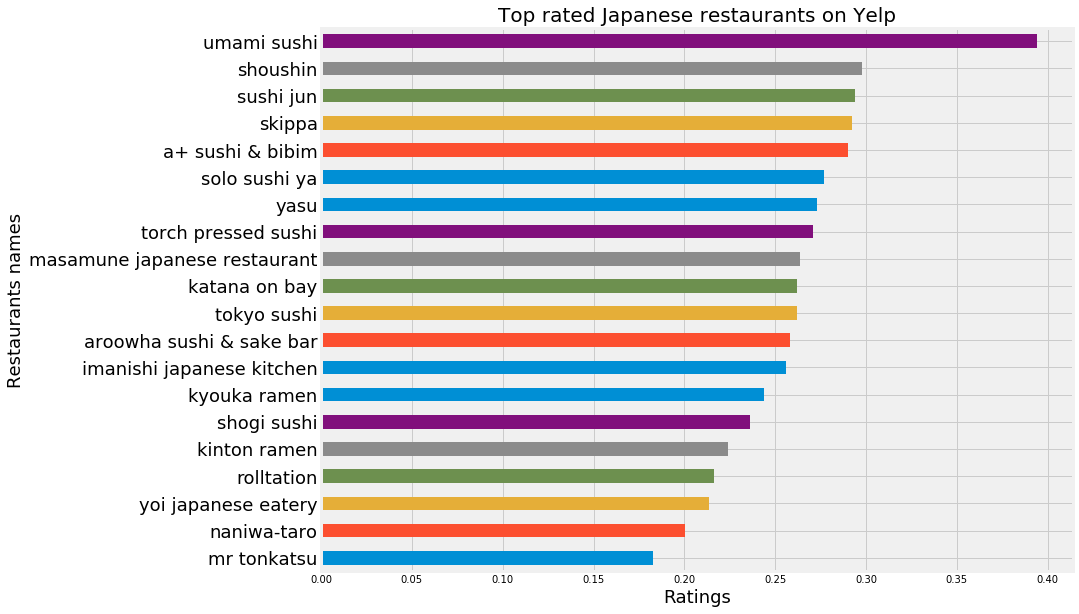

In [76]:
top_restaurants = foodon_jp.business_id.value_counts().index[:20].tolist()
review_top = foodon_jp.loc[foodon_jp['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['spm'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated Japanese restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

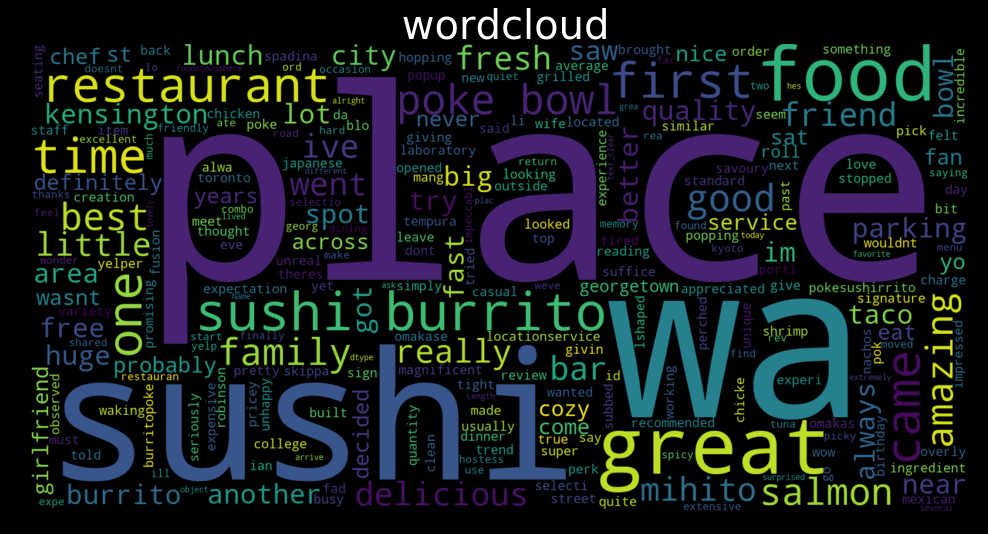

In [77]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(jacloud['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

# 5. Thai

In [78]:
foodon_th = goodfood.loc[(goodfood['category1'].isin(thai)) | (goodfood['category2'].isin(thai)) | (goodfood['category3'].isin(thai)) | (goodfood['category4'].isin(thai)) | (goodfood['category5'].isin(thai)) | (goodfood['category6'].isin(thai)) | (goodfood['category7'].isin(thai)) | (goodfood['category8'].isin(thai)) | (goodfood['category9'].isin(thai)) | (goodfood['category10'].isin(thai))]
foodon_th

BusinessAcceptsCreditCards  RestaurantsPriceRange2       Monday  \
120                         True                     2.0    11:0-21:0   
312                         True                     2.0          NaN   
351                          NaN                     1.0   8:30-21:30   
356                         True                     1.0   10:30-21:0   
458                         True                     2.0   17:0-21:30   
466                         True                     2.0  17:30-20:30   
527                         True                     2.0  11:30-21:30   
1084                        True                     2.0          NaN   
1186                        True                     2.0   11:30-22:0   
1244                        True                     3.0    18:0-23:0   
1369                         NaN                     2.0  11:30-21:30   
1625                         NaN                     1.0    11:0-21:0   
1930                        True                     2.0    17:0-22:0   
2057                         NaN                     2.0          NaN   
2120                         NaN                     1.0    11:0-22:0   
2142                         NaN                     2.0    11:0-22:0   
2585                         NaN                     2.0    12:0-23:0   
2913                        True                     1.0    11:0-21:0   
2943                        True                     1.0          NaN   
2960                        True                     2.0    11:0-23:0   
2988                         NaN                     2.0     9:0-22:0   
3064                        True                     2.0    11:0-22:0   
3150                        True                     2.0    11:0-23:0   
3162                        True                     2.0    11:0-19:0   
3196                         NaN                     2.0    11:0-22:0   
3416                         NaN                     2.0    11:0-22:0   
3741                         NaN                     2.0    11:0-22:0   
4396                         NaN                     1.0   11:0-18:30   
4453                         NaN                     2.0   11:30-22:0   
4533                         NaN                     2.0    11:0-22:0   
...                          ...                     ...          ...   
9292                        True                     1.0   11:30-22:0   
9300                       False                     1.0    17:0-19:0   
9327                        True                     2.0   11:30-21:0   
9455                         NaN                     2.0    11:0-22:0   
9503                        True                     1.0   11:30-21:0   
9614                        True                     2.0    17:0-22:0   
9688                        True                     2.0    11:0-22:0   
9873                        True                     2.0    11:30-0:0   
10131                        NaN                     2.0   11:30-22:0   
10175                        NaN                     3.0   11:30-15:0   
10208                       True                     2.0   11:30-22:0   
10371                        NaN                     2.0   11:30-22:0   
10433                       True                     2.0    11:0-23:0   
10640                       True                     1.0   12:0-21:30   
10834                       True                     1.0    11:0-21:0   
11042                        NaN                     2.0    11:0-22:0   
11151                        NaN                     2.0          NaN   
11395                       True                     1.0          NaN   
11699                        NaN                     2.0    10:0-22:0   
11740                        NaN                     2.0   11:30-21:0   
12045                        NaN                     1.0    11:0-22:0   
12101                       True                     2.0  11:30-21:30   
12344                        NaN                     NaN        

In [79]:
thcloud= xyz123.loc[(xyz123['category1'].isin(thai))]

In [80]:
f5 = foodon_th[['name', 'stars']].astype(str).apply(lambda x: '->  Rating: '.join(x), axis=1).tolist()
f5


['basil box->  Rating: 4.0',
 'georgetown thai cuisine->  Rating: 4.5',
 'my restaurant->  Rating: 4.0',
 'thai express->  Rating: 4.0',
 'joy thai restaurant->  Rating: 4.0',
 'gohyang restaurant->  Rating: 4.0',
 'thai senses restaurant->  Rating: 4.0',
 'truly thai cuisine->  Rating: 4.0',
 'thai house cuisine 2->  Rating: 4.0',
 'foxley bistro and bar->  Rating: 4.0',
 'hakka urban bistro->  Rating: 4.5',
 'wiang kuk thai food->  Rating: 4.0',
 'khao san road->  Rating: 4.0',
 'isaan der->  Rating: 4.0',
 'pho vuho->  Rating: 4.0',
 'dong gia viet thai cuisine->  Rating: 4.0',
 'si lom thai bistro->  Rating: 4.0',
 'green mango boys->  Rating: 4.0',
 'modern wok->  Rating: 4.0',
 'thai on yonge->  Rating: 4.0',
 'corner by spoon and fork->  Rating: 4.0',
 'twin fish thai cuisine->  Rating: 4.0',
 'thai fantasy->  Rating: 4.0',
 "hot mama noi's thai on the fly->  Rating: 4.0",
 'thai cuisine experts->  Rating: 4.5',
 'thai rice->  Rating: 4.0',
 'sabai sabai kitchen and bar->  Ratin

In [166]:
mapbox_access_token = 'pk.eyJ1IjoiYXBla3NoYW5pbm5la2FyIiwiYSI6ImNqb2hkdGdjazBnejQza3M2ZnFtd3dzZHUifQ.-9UbYbfjMlIeLgR0-Bzt9Q'
data = Data([
    Scattermapbox(
        lat=foodon_jp.latitude.tolist(),
        lon=foodon_jp.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol='bar',
            size=9
        ),
        text=f5,
    )
])


layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=44.00,
            lon=-80.00
        ),
        # use style light
        style='dark',
        pitch=0,
        # zoom label to 3
        zoom=8
    ),
)

# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')


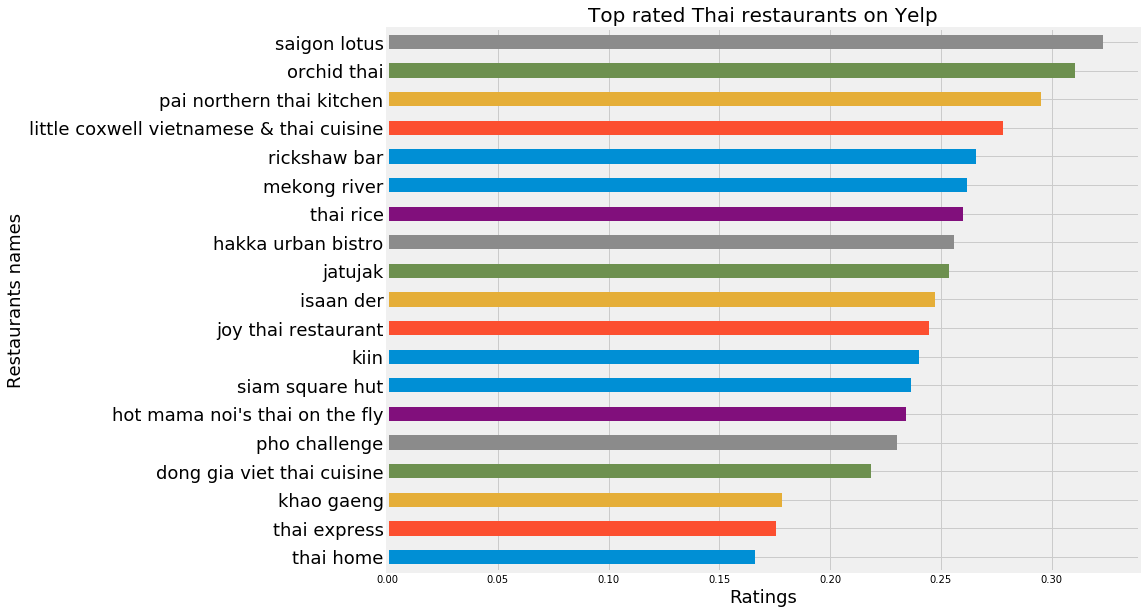

In [82]:
top_restaurants = foodon_th.business_id.value_counts().index[:20].tolist()
review_top = foodon_th.loc[foodon_th['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['spm'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated Thai restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

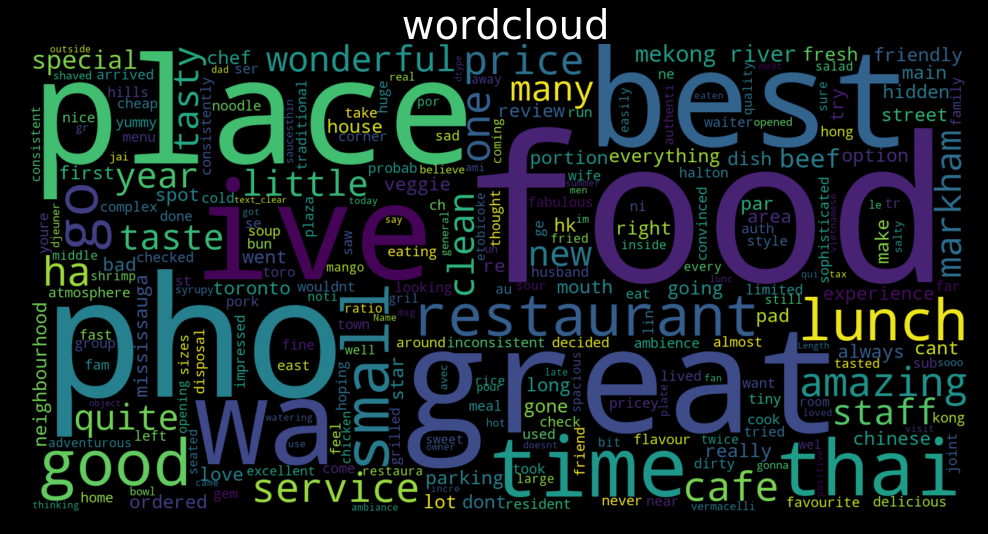

In [83]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(thcloud['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

In [133]:
goodfood.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'neighborhood', 'review_count', 'stars', 'state', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8', 'category9', 'category10', 'spm'],
      dtype='object')

In [134]:
goodfood.drop(goodfood.columns[[0]], axis=1, inplace=True)
goodfood.RestaurantsPriceRange2.replace([1.0, 2.0, 3.0, 4.0, 5.0], ['$','$$','$$$','$$$$','$$$$$'], inplace=True)
goodfood.columns

Index(['RestaurantsPriceRange2', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'address', 'business_id', 'city',
       'latitude', 'longitude', 'name', 'neighborhood', 'review_count',
       'stars', 'state', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'spm'],
      dtype='object')

In [135]:
busi = pd.read_csv("business.csv")
busi.drop(busi.columns[[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15]], axis=1, inplace=True)
busi.head()

business_id
0  Apn5Q_b6Nz61Tq4XzPdf9A
1  AjEbIBw6ZFfln7ePHha9PA
2  O8S5hYJ1SMc8fA4QBtVujA
3  bFzdJJ3wp3PZssNEsyU23g
4  8USyCYqpScwiNEb58Bt6CA

In [136]:
goodmerged = pd.merge(busi, goodfood, how='inner', on='business_id')
goodmerged.head()

business_id RestaurantsPriceRange2      Monday     Tuesday  \
0  5J3b7j3Fzo9ISjChmoUoUA                     $$   7:30-19:0   7:30-19:0   
1  YIez_A3WOt9J2SXN7OMa2Q                      $  11:30-22:0  11:30-22:0   
2  DqZzBPoiGt_FCTfNwPYwzw                      $   11:0-23:0   11:0-23:0   
3  Q_cfbLdAxkLiEZW5TO5T6A                     $$   7:30-18:0   7:30-18:0   
4  _T8qy9XAKAFLJdmoLg1Q-g                      $   11:0-23:0   11:0-23:0   

    Wednesday    Thursday      Friday    Saturday      Sunday  \
0   7:30-19:0   7:30-19:0   7:30-19:0    8:0-18:0    9:0-18:0   
1  11:30-22:0  11:30-22:0  11:30-22:0  11:30-22:0  12:0-21:30   
2   11:0-23:0   11:0-23:0    11:0-0:0    11:0-0:0   11:0-23:0   
3   7:30-18:0   7:30-18:0   7:30-18:0    9:0-16:0    9:0-16:0   
4   11:0-23:0    11:0-0:0    11:0-1:0    11:0-1:0   12:0-23:0   

                       address    ...       category2     category3  \
0    746 street clair avenue w    ...        bakeries  coffee & tea   
1           81 underhill drive    ...            food      bakeries   
2           126 clark avenue e    ...           pizza           NaN   
3  3469 lake shore boulevard w    ...        bakeries           NaN   
4            5314 yonge street    ...     restaurants           NaN   

     category4 category5 category6  category7  category8 category9 category10  \
0          NaN       NaN       NaN        NaN        NaN       NaN        NaN   
1  restaurants       NaN       NaN        NaN        NaN       NaN        NaN   
2          NaN       NaN       NaN        NaN        NaN       NaN        NaN   
3          NaN       NaN       NaN        NaN        NaN       NaN        NaN   
4          NaN       NaN       NaN        NaN        NaN       NaN        NaN   

        spm  
0  0.339953  
1  0.137492  
2  0.319166  
3  0.403798  
4  0.222096  

[5 rows x 29 columns]

In [137]:
goodmerged.to_csv("goodmerged.csv")


In [139]:
abcabc= pd.read_csv("goodmerged.csv")
abcabc.columns

Index(['Unnamed: 0', 'business_id', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'address', 'city', 'latitude', 'longitude', 'name', 'neighborhood',
       'review_count', 'stars', 'state', 'category1', 'category2', 'category3',
       'category4', 'category5', 'category6', 'category7', 'category8',
       'category9', 'category10', 'spm'],
      dtype='object')

In [ ]:
------------------------------------------------------------------------------------------------------------------------------